In [1]:
# In order to visualize the decision trees we would be needing some libraries
!pip install graphviz

In [2]:
!pip install pydotplus

In [3]:
# Importing necessary libraries for loading the data and visualizing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\saimmidi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# importing necessary libraries to prevent from errors when using visualizations
import warnings
warnings.filterwarnings('ignore')

In [5]:
# importing necessary libraries for model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Loading the data into dataframes
heart_dataframe = pd.read_csv(r'heart_v2.csv')

In [7]:
# Reading the dataframe
heart_dataframe.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


#### Data Inspection

In [8]:
# analyzing the information of the dataframe
heart_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [9]:
# shape of the dataframe
heart_dataframe.shape

(270, 5)

In [10]:
# columns of the dataframe
heart_dataframe.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [11]:
# values of the dataframe
heart_dataframe.values

array([[ 70,   1, 130, 322,   1],
       [ 67,   0, 115, 564,   0],
       [ 57,   1, 124, 261,   1],
       ...,
       [ 56,   0, 140, 294,   0],
       [ 57,   1, 140, 192,   0],
       [ 67,   1, 160, 286,   1]], dtype=int64)

In [12]:
# describe of the numerical columns of the dataframe
heart_dataframe[['age', 'BP', 'cholestrol']].describe()

,age,BP,cholestrol
count,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259
std,9.109067,17.861608,51.686237
min,29.000000,94.000000,126.000000
25%,48.000000,120.000000,213.000000
50%,55.000000,130.000000,245.000000
75%,61.000000,140.000000,280.000000
max,77.000000,200.000000,564.000000


- From the above data inspection we can get to know that there are no missing values in the data set. Hence we no need to treat the missing values. Anyways Decision Tree models can handle missing values and no need of performing any data preparation steps. It is sufficient to perform some of the univariate and bivariate analysis in order to understand the variation in the data as well as the variation in reference to other variables. Let's proceed for visualizing the data.

#### Univariate Analysis

In [13]:
# analyzing the data again 
heart_dataframe.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


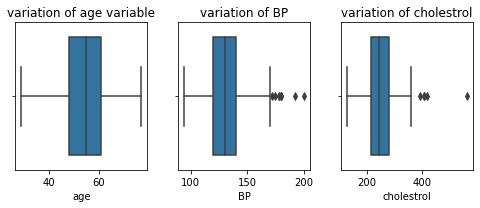

In [14]:
# analyzing the variation in numerical variables
plt.figure(figsize= (7,3))
plt.subplot(1,3,1)
sns.boxplot(heart_dataframe['age'])
plt.title('variation of age variable')
plt.subplot(1,3,2)
sns.boxplot(heart_dataframe['BP'])
plt.title('variation of BP')
plt.subplot(1,3,3)
sns.boxplot(heart_dataframe['cholestrol'])
plt.title('variation of cholestrol')
plt.tight_layout()
plt.show()

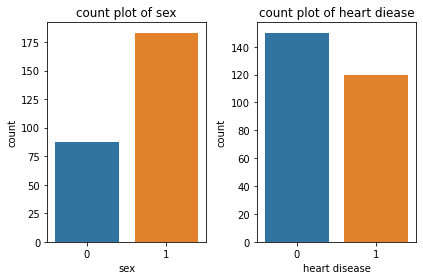

In [15]:
# variaton of categorical variables
plt.figure()
plt.subplot(1,2,1)
sns.countplot(heart_dataframe['sex'])
plt.title('count plot of sex')
plt.subplot(1,2,2)
sns.countplot(heart_dataframe['heart disease'])
plt.title('count plot of heart diease')
plt.tight_layout()
plt.show()

### Bivariate analysis

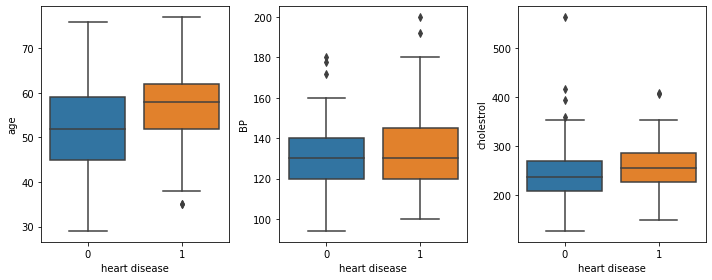

In [16]:
# analyzing the numerical variables in relation with target variable
plt.figure(figsize= (10,4))
plt.subplot(1,3,1)
sns.boxplot(heart_dataframe['heart disease'], heart_dataframe['age'])
plt.subplot(1,3,2)
sns.boxplot(heart_dataframe['heart disease'], heart_dataframe['BP'])
plt.subplot(1,3,3)
sns.boxplot(heart_dataframe['heart disease'], heart_dataframe['cholestrol'])
plt.tight_layout()
plt.show()

__From above variation between target variable and numerical variables the following observations can be made:__
- The variation in age is more for people not having heart disease in compared to people having heart disease. Also the median value for people having heart disease is more when compared to people not having heart disease.
- The variation in people having heart disease is more in relation with BP though their median  values are same.
- There exists slight increase in variation of cholestrol in relation with people having no heart disease in comparison with people having heart disease.

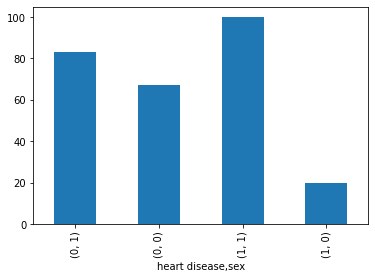

In [17]:
# variation of categorical variable in relation with target variable
heart_dataframe.groupby('heart disease')['sex'].value_counts().plot.bar()

- From the above bar plot we can see that the variation in value counts between heart disease patients and non heart disease patients between males and femals. We can see that people having no heart disease males are more and in people having heart disease again males are more.

### Creating X and y variables

In [18]:
# analyzing the dataframe again
heart_dataframe.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [19]:
# defining X and y variables
X = heart_dataframe.iloc[:, :4]
y = heart_dataframe['heart disease']

In [20]:
# analyzing X variables
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [21]:
# analyzing the y variables
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [22]:
# making test tarin split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size =  0.3, random_state = 100)

In [23]:
# analyzing X_train
X_train.head()

,age,sex,BP,cholestrol
55,41,0,105,198
22,43,1,115,303
200,68,1,118,277
11,53,1,142,226
15,71,0,112,149


In [24]:
# analyzing the shape of X_train and X_test
print(X_train.shape, X_test.shape)

(189, 4) (81, 4)


#### Model Building

In [25]:
# defining the model object
dt = DecisionTreeClassifier(max_depth = 3)

In [26]:
# fitting the data on the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

- As of now we have built the model considering all the hyper parameters to be default except the max_depth = 3 for similar understanding of the model. Upon assigning optimal values to the hyper paramerters we will get better model which will closely represent the data.
- Difference between hyper parameters and normal parameters are model parameters are nothing but the features of the data whereas hyper parameters are the parameteres which are defined before the learning alogrithm learns on the training data set.
- These hyper parameters are defined by the user and any value can be assigned to these parameters. 
- Upon assigning values to the hyper parameters we will get better model.
- The process of assigning optimal values to the hyper parameters is defined as hyper parameters tuning.

In [27]:
# for visualizing the decision tree we need some special packages
import pydotplus
import graphviz

In [28]:
# in order to create a image of the object we need install Ipython package
!pip install ipython

In [29]:
# some other necessary libraries needed to plot the grpahviz object
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

- The steps to create the decision treee graphviz image
1) we will intiate the dot_data
2) we will create graphviz object and output it as dot file
3) Using pydotplus library we extract the graph from the dot file
4) Using Image object we create the png of the graph object

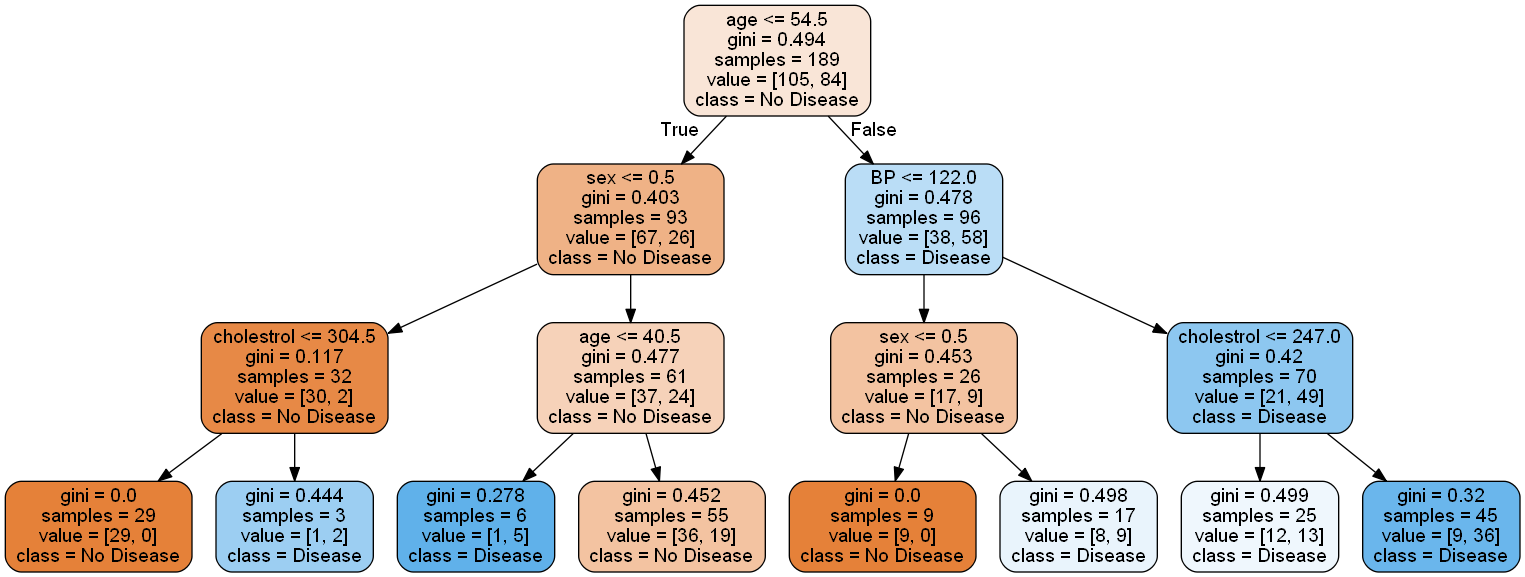

In [30]:
# Defining the dot object
dot_data = StringIO()

# creating graphviz object and output it as dot file
export_graphviz(dt, out_file= dot_data, filled = True, rounded= True, feature_names= X.columns, 
                class_names= ['No Disease', 'Disease'])

# creating the graph object from the dot file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# storing the image into png format
Image(graph.create_png())

- Basically in order to create the graphviz object we convert the graphiz object on to the dot data then import the dot data using pydotplus package. Finally output the graph through Image.

- In order to interpret the decision tree we transverse down the tree until we reach to the leaf node.
- To get to an decision for an set of parameteres we tranverse down the tree taking into consideration of the conditions of the features until we reach to a decision or the prediction.<br><br>
Now we have the decision tree. Let's make some predictions on the train and test dataset and see how the model is performing

### Model Evaluation

In [31]:
# makig predictions on the train dataset
y_train_pred = dt.predict(X_train)

In [32]:
# analyzing the predictions made on the train dataset
y_train_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [33]:
# checking the performance of the model using metrics on the train dataset
confusion_matrix(y_train, y_train_pred)

array([[74, 31],
       [19, 65]], dtype=int64)

- From the above confusion matrix we can get information about the TN, TP, FP, FN with which we estimtae how the model was able to make predictions correctly and how many miss classifications has been made by the model.
- From confusion matrix we can see that the model has performed decent in identifying the TN and TP properly and making little miss classifications

In [34]:
# analyzing the accuracy score of the model on train dataset
accuracy_score(y_train, y_train_pred)

0.7354497354497355

- The accuracy score is pretty decent. Let's also check for the accuracy score on test data set as well. As of now we are only considering accuracy score into reference for accessing the goodness of fit of the model. But later as per the business problem the other metrics also will be taken into consideration.

In [35]:
# making predictions on the test dataset
y_test_pred = dt.predict(X_test)

In [36]:
# analzying the y_test_pred
y_test_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [37]:
# analyzing the confusion matrix
confusion_matrix(y_test, y_test_pred)

array([[22, 23],
       [14, 22]], dtype=int64)

In [38]:
# analyzing the accuracy score
accuracy_score(y_test, y_test_pred)

0.5432098765432098

- Upon compraing the accuracy scores we can see that there has bee drastic decrease in accuracy model when tested the model on the unseen dataset. This is an indication that the model didn't perform well on the test dataset. The reason for not performing well on the test dataset is we have constructed the model considering only the default hyper paramters. Upon considering optimal values for the hyper parameters then we may get better model.This process of tuning the hyper parameters is referred to as hyper parameter tuning.

- One of the disadvantages of the decision trees is that it overfits terribly if it is not controlled hence it is also called as high variance model. In order to overcome this overfitting problem we need to perform some tree truncation or tree pruning methods. In tree truncation the depth of the tree is controlled by choosing some consious limit so that the tree doesn't split until its leaf nodes coressponds to one single record of the data. When doing tree truncation methods we follow some of the tree truncation stratergies in order to limit the tree consiously. On the other hand tree pruning in which the tree is allowed to extent to its last possible split level so that each leaf node corresponds to single record of the data thereby allowing the model to memorize all the data points in the training dataaset. Once the tree extended to its final limit we then cut the leafs and branches to avoid ovcerfitting issues. Since we cut leafs and branches in tree pruning is refered to as bottom up approach adn tree truncation is refered to top down approach.

- Some of the tree truncation stratergies are nothing but hyper parameter tuning or a threshold can be considered in order to split a node. When the homogenity at the node becomes greater than threshold value then it is an indication that not further split needs to be done and if the homogenity value is less than threshold then we try to further split the node in such a way that the split nodes as homogenous as possible.

### Hyper Parameter Tuning

- Before performing hyper paramter tuning let's define some helper functions in terms of creating of graph and to estimate the performance of the model. Doing so we no need to write again and again for creating the graphviz object and estimating the model.

In [39]:
# defining helper function for creating graphviz object
def graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file = dot_data, filled = True, rounded= True,
                    feature_names=X.columns, class_names= ['No Disease', 'Disease'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [40]:
# defining helper function for estimating the performance of the model
def performance_estimation(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print('Train dataset performance')
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print('-'*50)
    print('Test dataset performance')
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

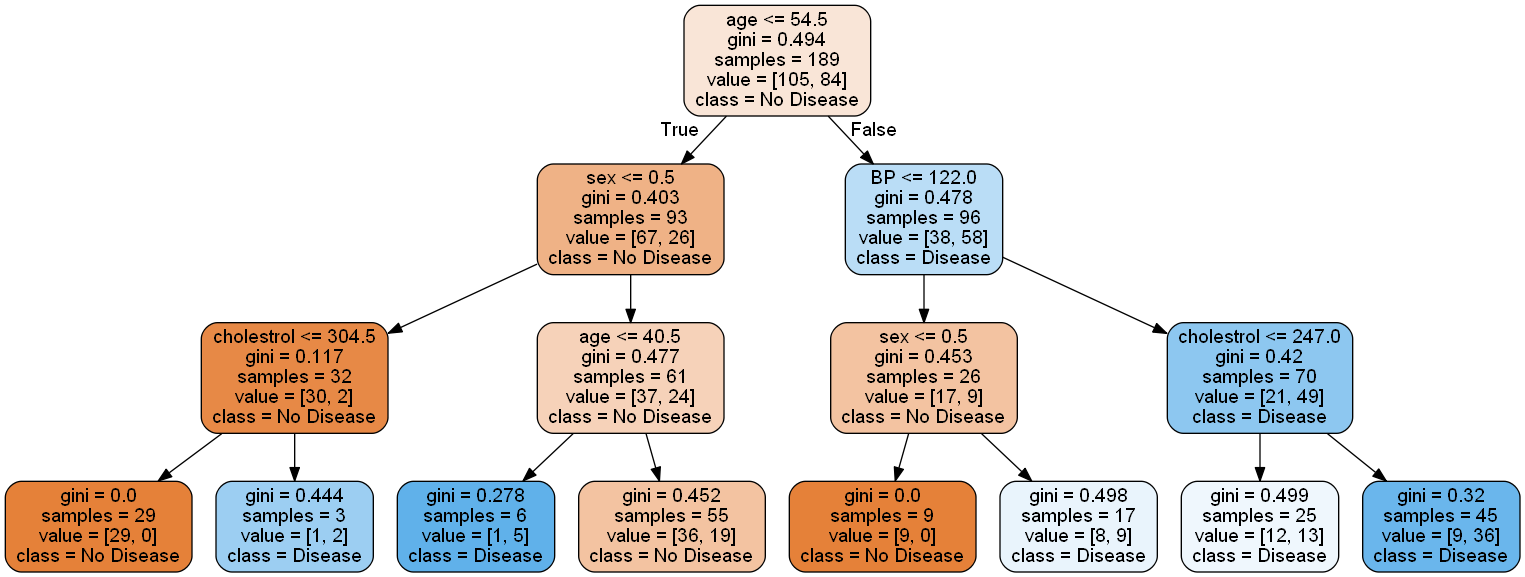

In [41]:
# checking on the previous defined decision tree with max_depth limitation
graph_output = graph(dt)
Image(graph_output.create_png())

In [42]:
# checkinh the performance of the previous decision tree using helper function
performance_estimation(dt)

Train dataset performance
0.7354497354497355
[[74 31]
 [19 65]]
--------------------------------------------------
Test dataset performance
0.5432098765432098
[[22 23]
 [14 22]]


#### Creating Decision tree with all default hyper parameters

In [43]:
# defining the decision tree classifier object
dt_default = DecisionTreeClassifier()
# fitting the model object on top of the model
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

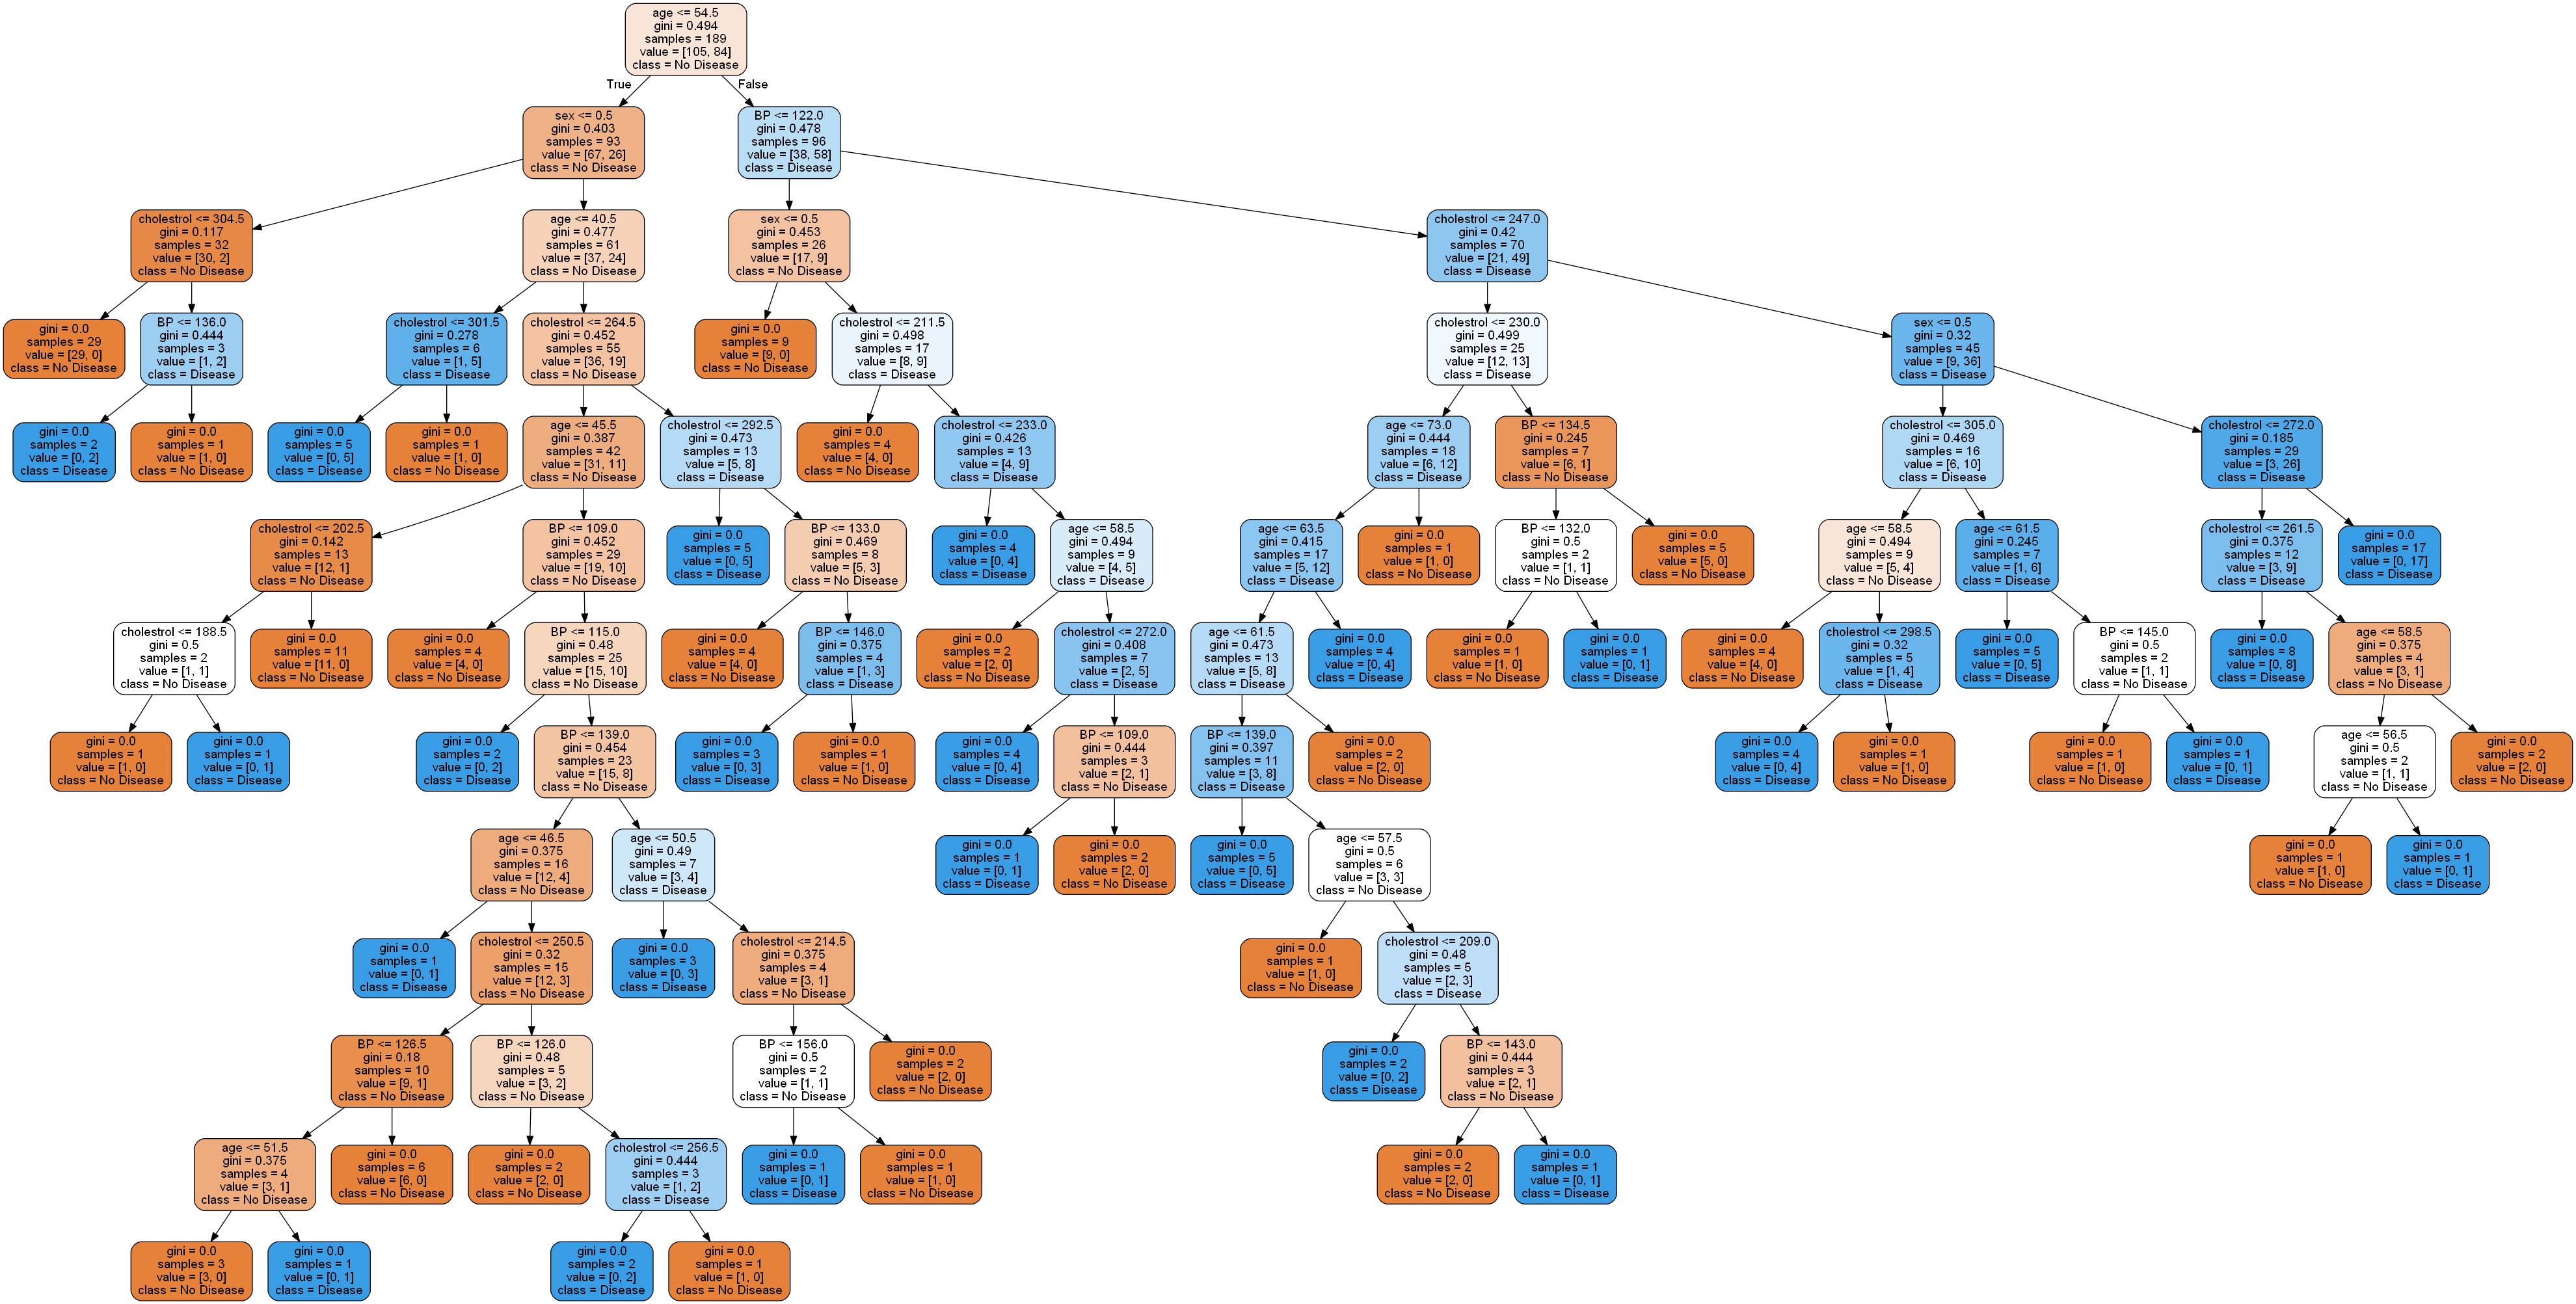

In [44]:
# creating the decision tree graph
graph_output_default = graph(dt_default)
Image(graph_output_default.create_png())

- Since we have constructed the decision tree using the default parameters without tuning any hyper paramters it has resulted a decision tree which has extented to its final split which is an indication that the model has memorized all the data points in the training dataset. Thus overfitting on the train dataset. Upon setting the hyper paramters to its default it will split each node until each leaf nodes contains only one record of train data.
- At the same time we can see that the decision tree obtained is hard to interpret as the depth is high thereby making the decision tree complex.

In [45]:
# checking the performance
performance_estimation(dt_default)

Train dataset performance
1.0
[[105   0]
 [  0  84]]
--------------------------------------------------
Test dataset performance
0.5679012345679012
[[26 19]
 [16 20]]


#### Hyper parameter tuning of max_depth

In [46]:
# defining the model object
dt_depth = DecisionTreeClassifier(max_depth = 3, random_state = 100)
# fitting the data on top of model object
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

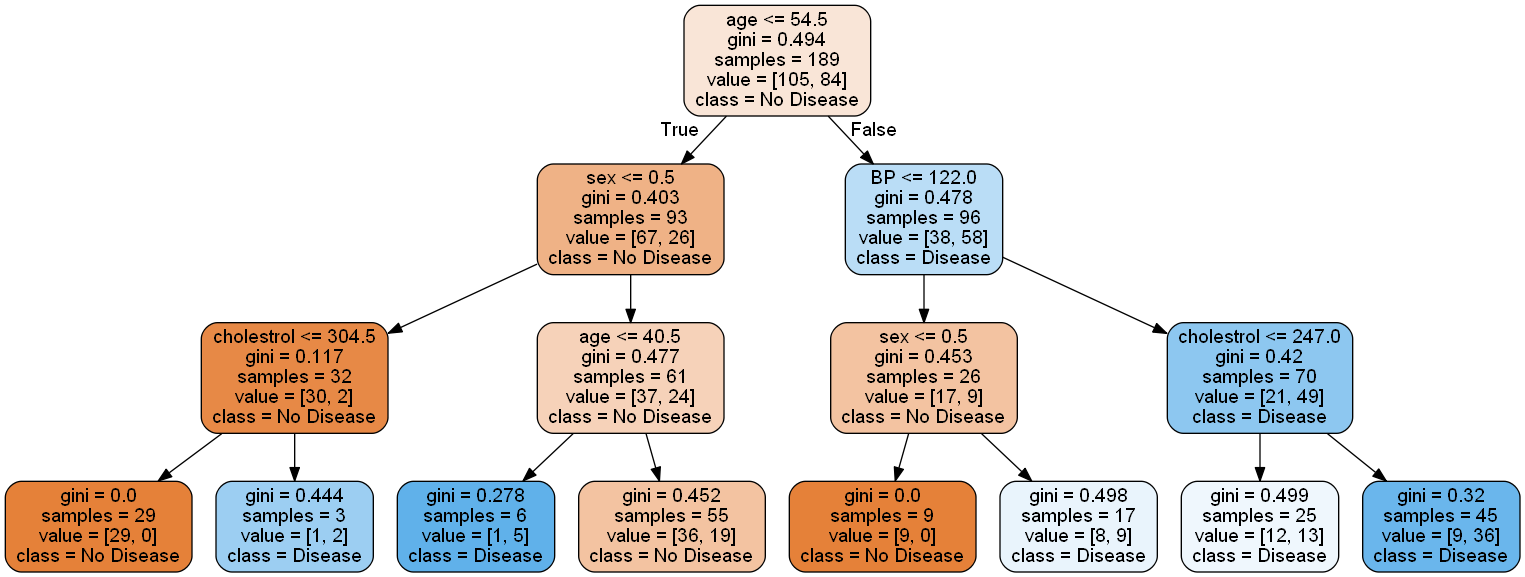

In [47]:
# building the decision tree
graph_output_depth = graph(dt_depth)
Image(graph_output_depth.create_png())

In [48]:
# estimating the performace of the model
performance_estimation(dt_depth)

Train dataset performance
0.7354497354497355
[[74 31]
 [19 65]]
--------------------------------------------------
Test dataset performance
0.5432098765432098
[[22 23]
 [14 22]]


#### Hyper parameter tuning of min_samples_split

- min_sample_split = upon assigning value to min_samples_split it assign limit to the minimum number of samples to be present at a internal node to be eligible for split. If the number of samples present at a node are less than min_sample_split then that particular node will not be eligible to split and it can be considered as leaf node. If the number of samples at a particular internal node are more than min_sample_split it that particular node can be splitted.

In [49]:
dt_min_samples_split = DecisionTreeClassifier(min_samples_split= 30, random_state = 100)
dt_min_samples_split.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

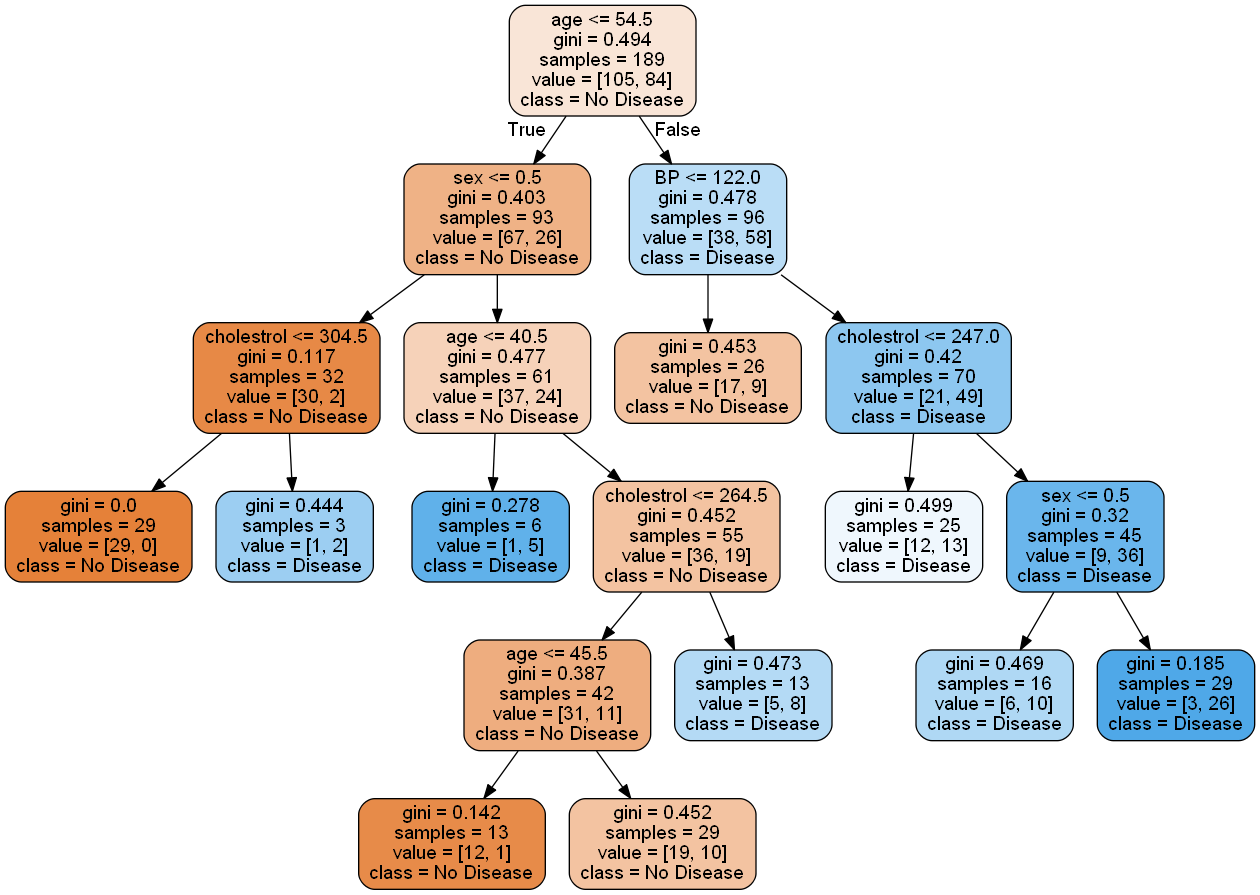

In [50]:
# building the decision tree
graph_output_min_samples_split = graph(dt_min_samples_split)
Image(graph_output_min_samples_split.create_png())

In [51]:
# estimating the performance of the model
performance_estimation(dt_min_samples_split)

Train dataset performance
0.746031746031746
[[77 28]
 [20 64]]
--------------------------------------------------
Test dataset performance
0.48148148148148145
[[18 27]
 [15 21]]


#### Hyper parameter tuning of min_samples_leaf

In [60]:
dt_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf= 20, random_state = 100)
dt_min_samples_leaf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

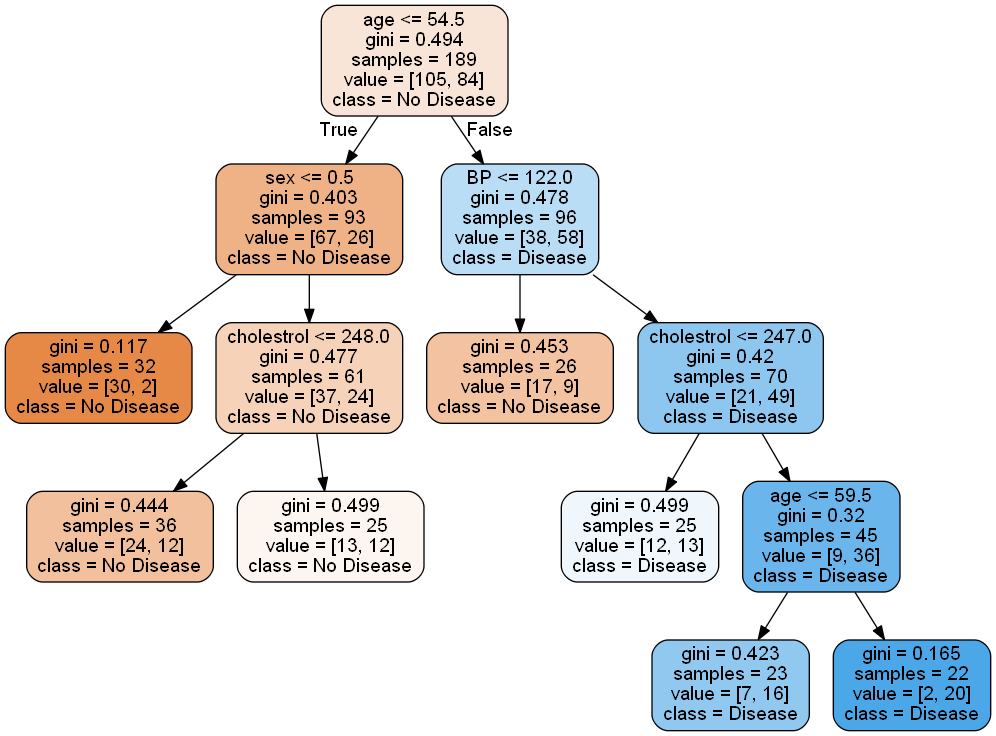

In [61]:
graph_min_samples_leaf = graph(dt_min_samples_leaf)
Image(graph_min_samples_leaf.create_png())

In [62]:
performance_estimation(dt_min_samples_leaf)

Train dataset performance
0.7037037037037037
[[84 21]
 [35 49]]
--------------------------------------------------
Test dataset performance
0.5308641975308642
[[27 18]
 [20 16]]


#### Hyper parameter tuning of criterion

In [63]:
dt_criterion = DecisionTreeClassifier(criterion= 'entropy', max_depth = 3, random_state = 100)
dt_criterion.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

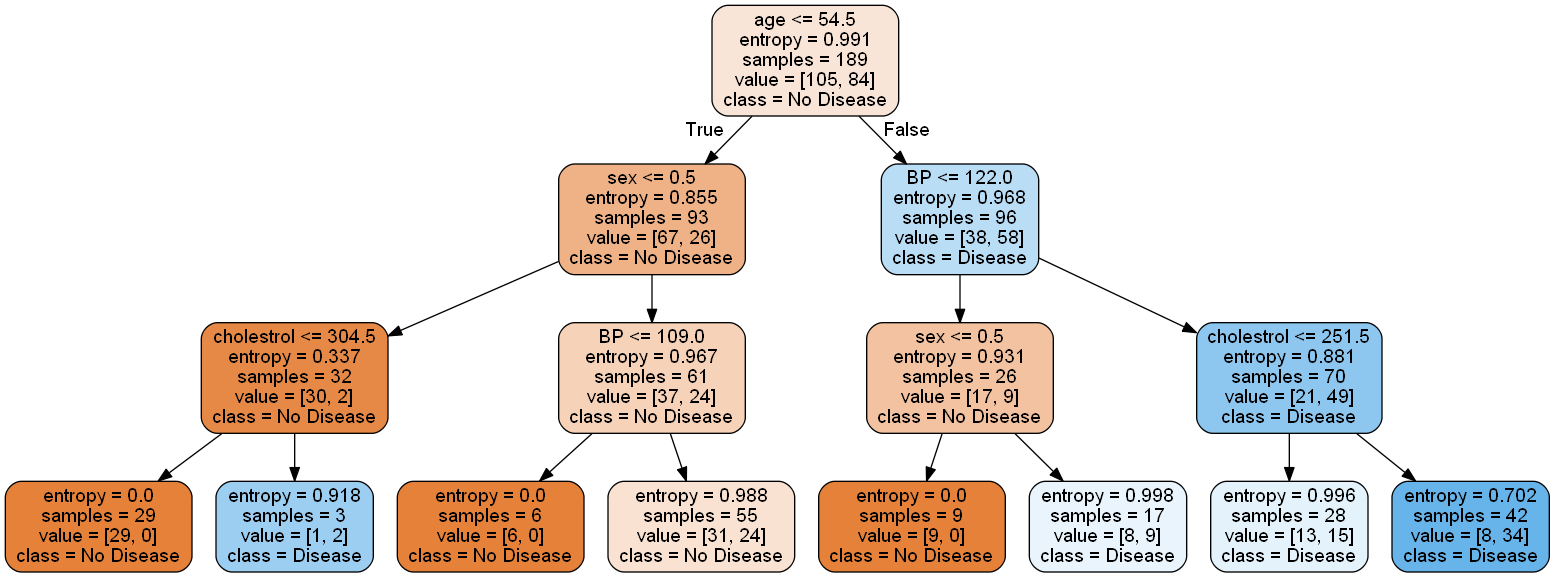

In [64]:
graph_criterion = graph(dt_criterion)
Image(graph_criterion.create_png())

In [65]:
performance_estimation(dt_criterion)

Train dataset performance
0.7142857142857143
[[75 30]
 [24 60]]
--------------------------------------------------
Test dataset performance
0.5802469135802469
[[26 19]
 [15 21]]


### Hyper parameter tuning using Gridsearchcv

- In this case we perform the hyper parameter tuning process using gridsearch cv. We use K fold cross validation technique in finding out the optimal parameters of the model using gridsearch package. IN k fold cross validation we divide the train ing dataset into train and validation set. We than shuffle the train and validation sets in order to get an generalised estimation of the performance of the model when evaluated on the test data set which will be an complete unseen dataset by the model. Each time one of the fold will serve as the validation set and remaining folds will help in training the model. On validation set the accuracy measure or any other goodness of fit measure is checked. The average of goodness of measure fits will give an estimate of how the model will be able to perform on the test dataset. Upon performing cross validation we will be also get to know about the combination of hyper parameters which yields better results on both train and test dataset.<br><br>
- The disadvantage of just splitting the data into train and test dataset is that the model is able to see the test dataset during the tuning process. Hence it will not result in generalized model.<br><br>
- Splitting the train dataset into just one fixed train and validation dataset will also fail to result in better generalized model as we are checking the model only one fixed validation set. Though this kind of approach will perform better when compared just train and test split. But better generalized model can be obtained using k-fold cross validation.

In [66]:
# intiating the model object
dt_grid = DecisionTreeClassifier(random_state = 100)

In [86]:
# defining the parameter combinations for giving input to gridsearch cv method
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'min_samples_split': list(np.arange(5,101)),
          'min_samples_leaf': list(np.arange(5,101))}

In [68]:
# defining the gridsearch method using cross validation
from sklearn.model_selection import GridSearchCV

In [87]:
# intiating the GridSearchCV method
grid_search = GridSearchCV(estimator= dt_grid, param_grid= params, scoring= 'accuracy', n_jobs= -1, cv =5, verbose= 1)

__It is necessary to know about the attributes which are passed in GridSearchCV method:__
- estimator = it is nothing but the decision tree model object which has been defined
- param_grid = we pass the param combination that we have defined earlier
- verbose = it defines step by step process of execution
- n_jobs = when given -1 it uses multi cores for the processing if the machine is a multi core processing machine
- scoring = goodness of the fit measure is passed like accuracy, sensitivity or specificity etc.
- cv = number of folds are mentioned

In [88]:
# lets fit the gridsearch object defined
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 350208 candidates, totalling 1751040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 1765 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 5265 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 10165 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 16465 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 24165 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 33265 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 43765 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 55665 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 68965 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 83665 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 99765 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 117265 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 136165 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 15

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43...6, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [89]:
# detailed combiantional information
grid_search.cv_results_

{'mean_fit_time': array([0.00561504, 0.0070713 , 0.01096087, ..., 0.0037899 , 0.00718079,
        0.0047873 ]),
 'std_fit_time': array([0.00134713, 0.00201585, 0.00412369, ..., 0.00039911, 0.00364534,
        0.00074638]),
 'mean_score_time': array([0.00243196, 0.00354414, 0.00271564, ..., 0.00199442, 0.00179482,
        0.00219388]),
 'std_score_time': array([4.93833902e-04, 2.89878169e-03, 7.02414936e-04, ...,
        5.30983387e-07, 3.98516922e-04, 3.99255881e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 2, 2, ..., 20, 20, 20],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[5, 5, 5, ..., 100, 100, 100],
              mask=[Fa

In [74]:
# we can create a dataframe to the reuslts rather than looking in dictionary format
grid_search_dataframe = pd.DataFrame(grid_search.cv_results_)
grid_search_dataframe.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005179,0.000893,0.002360,0.000786,gini,2,5,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.631579,...,0.656085,0.029136,2530,0.708609,0.708609,0.715232,0.715232,0.736842,0.716905,0.010399
1,0.015762,0.020243,0.002596,0.000798,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.631579,...,0.656085,0.029136,2530,0.708609,0.708609,0.715232,0.715232,0.736842,0.716905,0.010399
2,0.006625,0.003724,0.002026,0.000112,gini,2,5,15,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.631579,...,0.656085,0.029136,2530,0.708609,0.708609,0.715232,0.715232,0.736842,0.716905,0.010399
3,0.005726,0.001046,0.002006,0.000019,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.631579,...,0.656085,0.029136,2530,0.708609,0.708609,0.715232,0.715232,0.736842,0.716905,0.010399
4,0.005147,0.001299,0.008824,0.013198,gini,2,5,25,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.631579,...,0.656085,0.029136,2530,0.708609,0.708609,0.715232,0.715232,0.736842,0.716905,0.010399


In [90]:
# sorting the dataframe in terms of mean_test_score
grid_search_dataframe.sort_values('mean_test_score', ascending = False, inplace= True)

In [76]:
# checking the dataframe again after sorting
grid_search_dataframe.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2100,0.004934,0.001171,0.002007,0.000573,entropy,4,5,5,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.631579,...,0.698413,0.048698,1,0.781457,0.748344,0.768212,0.794702,0.776316,0.773806,0.015369
2101,0.005634,0.001389,0.008078,0.011161,entropy,4,5,10,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.631579,...,0.698413,0.048698,1,0.781457,0.748344,0.768212,0.794702,0.776316,0.773806,0.015369
2302,0.005910,0.001002,0.002038,0.000121,entropy,6,5,15,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.605263,...,0.687831,0.057589,3,0.814570,0.788079,0.781457,0.807947,0.809211,0.800253,0.013007
3508,0.004274,0.000524,0.002040,0.000278,entropy,18,5,45,"{'criterion': 'entropy', 'max_depth': 18, 'min...",0.631579,...,0.687831,0.052352,3,0.748344,0.695364,0.688742,0.735099,0.736842,0.720878,0.024063
2108,0.004919,0.000824,0.002233,0.000402,entropy,4,5,45,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.631579,...,0.687831,0.052352,3,0.748344,0.695364,0.688742,0.735099,0.736842,0.720878,0.024063


- From the dataframe we can look for the best combination of parameters. But there are some handy operations available in grid_seacrh class. Let's use them and get the best score and best estimators or the best combination of parameters

In [91]:
# analyzing the shape of the dataframe
grid_search_dataframe.shape

(3800, 24)

In [92]:
# finding the best estimators or best combination of parameters
dt_best = grid_search.best_estimator_

- grid_serach.best_estimator_ is itself is the decision tree fit object.

In [93]:
# checking for the best score
grid_search.best_score_

0.6984126984126984

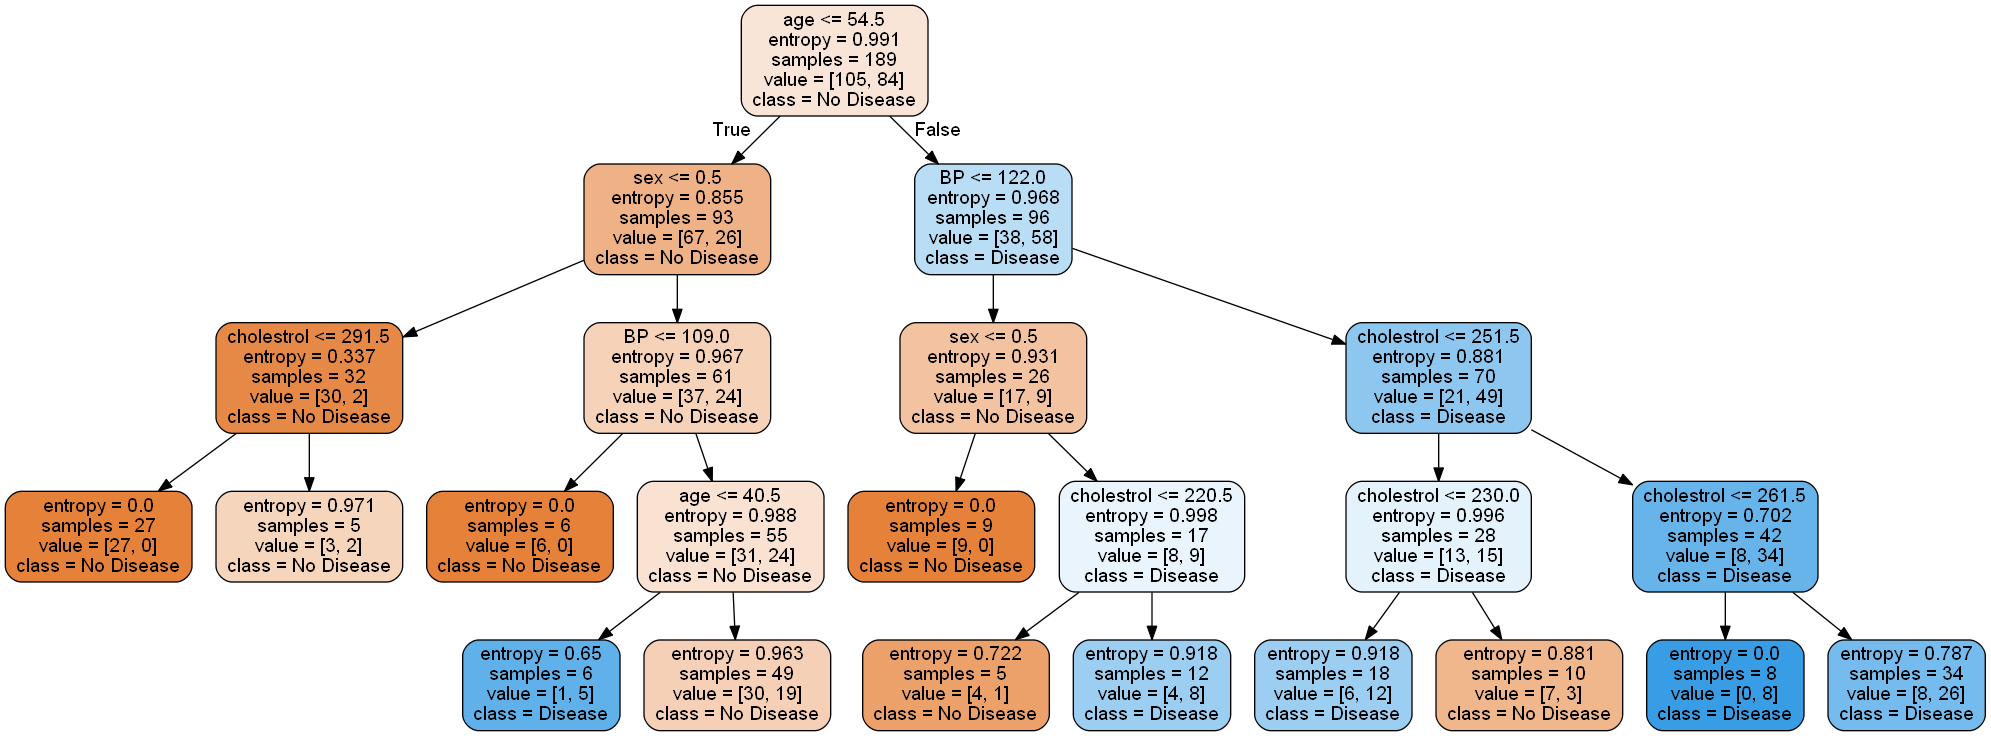

In [94]:
# building the decision tree on the best combination hyper parameters
graph_output_best = graph(dt_best)
Image(graph_output_best.create_png())

In [95]:
# performance estimation on the test dataset
performance_estimation(dt_best)

Train dataset performance
0.7671957671957672
[[86 19]
 [25 59]]
--------------------------------------------------
Test dataset performance
0.5555555555555556
[[25 20]
 [16 20]]


#### Hyper parameter tuning of max depth alone and finding out the optimal depth value

In [96]:
params = {'max_depth': [2,3,4,5,6,7,8,9,10]}

In [97]:
# intiating the decision tree model object
dt_depth_test = DecisionTreeClassifier(random_state = 100)

In [98]:
# definig gridsearchcv model object
grid_search_test = GridSearchCV(estimator=dt_depth_test,
                                cv = 5,
                                scoring= 'accuracy',
                                n_jobs=-1,
                                verbose=1,
                                param_grid= params)

In [99]:
# fitting the data on top of the grid search cv object
grid_search_test.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   15.4s finished
C:\Users\saimmidi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [100]:
# checking the results of the gridsearchcv results
grid_search_test.cv_results_

{'mean_fit_time': array([0.0059833 , 0.00517807, 0.00578537, 0.00738058, 0.00698147,
        0.00658283, 0.00718026, 0.00758348, 0.0069818 ]),
 'std_fit_time': array([0.00178363, 0.00171904, 0.00116416, 0.00101727, 0.0019948 ,
        0.00079786, 0.00193469, 0.00135297, 0.00109284]),
 'mean_score_time': array([0.00199585, 0.00179477, 0.00239501, 0.00219388, 0.00339251,
        0.00219407, 0.0021946 , 0.00239272, 0.00199413]),
 'std_score_time': array([0.00063023, 0.00074615, 0.00049001, 0.00074656, 0.00173941,
        0.00074619, 0.00074567, 0.00048929, 0.00062955]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

In [101]:
# creating the dataframe of the cv results
grid_results_dataframe = pd.DataFrame(grid_search_test.cv_results_)

In [102]:
# checking the dataframe
grid_results_dataframe.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005983,0.001784,0.001996,0.000630,2,{'max_depth': 2},0.631579,0.657895,0.710526,0.631579,...,0.656085,0.029136,1,0.708609,0.708609,0.715232,0.715232,0.736842,0.716905,0.010399
1,0.005178,0.001719,0.001795,0.000746,3,{'max_depth': 3},0.657895,0.684211,0.552632,0.631579,...,0.634921,0.044668,4,0.741722,0.735099,0.728477,0.761589,0.743421,0.742062,0.011102
2,0.005785,0.001164,0.002395,0.000490,4,{'max_depth': 4},0.736842,0.710526,0.552632,0.605263,...,0.656085,0.068216,1,0.821192,0.814570,0.807947,0.821192,0.802632,0.813506,0.007327
3,0.007381,0.001017,0.002194,0.000747,5,{'max_depth': 5},0.710526,0.657895,0.605263,0.605263,...,0.629630,0.049691,6,0.867550,0.867550,0.867550,0.847682,0.842105,0.858487,0.011238
4,0.006981,0.001995,0.003393,0.001739,6,{'max_depth': 6},0.684211,0.684211,0.578947,0.578947,...,0.629630,0.047365,6,0.887417,0.880795,0.900662,0.880795,0.868421,0.883618,0.010506


In [113]:
# analyzing the shape of the grid search cv results dataframe
grid_results_dataframe.shape

(9, 21)

In [103]:
# creating a subset of the dataframe
subset_dataframe = grid_results_dataframe[['param_max_depth', 'mean_test_score', 'mean_train_score']]

In [112]:
# sorting the dataframe based on mean_test_score
subset_dataframe.sort_values('mean_test_score', ascending= False, inplace= True)
# checking the subset dataframe
subset_dataframe.head()

,param_max_depth,mean_test_score,mean_train_score
0,2,0.656085,0.716905
2,4,0.656085,0.813506
5,7,0.640212,0.933853
1,3,0.634921,0.742062
8,10,0.634921,0.980159


- The mean values of the above train and test scores are the mean values of the scoring parameter calculates for 5 folds for each model fit for each param value mentioned in parameter. Upon knowing about the mean of the test scores we can get to know an estimate of how the model will be able to perform on test dataset. The mean test score will be close to the accuracy score when checked on the test dataset.

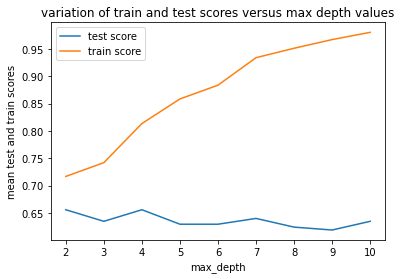

In [108]:
# plotting the subset dataframe in order to find optimal max_depth value
plt.figure()
plt.plot(subset_dataframe['param_max_depth'], subset_dataframe['mean_test_score'],label = 'test score')
plt.plot(subset_dataframe['param_max_depth'], subset_dataframe['mean_train_score'],label = 'train score')
plt.xlabel('max_depth')
plt.ylabel('mean test and train scores')
plt.title('variation of train and test scores versus max depth values')
plt.legend(loc = 0)
plt.show()

- from the above graph we can see that as the depth increases the train dataset accuracy increases as the model tends to overfit. Hence the optimal value could be 2 as at that value train and test accuracy scores are little close to each other and at any other value the train and test accuracy are diverging from each other. Hence considering max_depth =2 would be the optimal value but the grouping of values will not be accurate with such small depth of tree.

In [109]:
# let's build the decision tree considering the optimal value of max_depth
dt_depth_optimal  = DecisionTreeClassifier(max_depth= 2, random_state = 100)
# fitting the data on top of the training data set
dt_depth_optimal.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

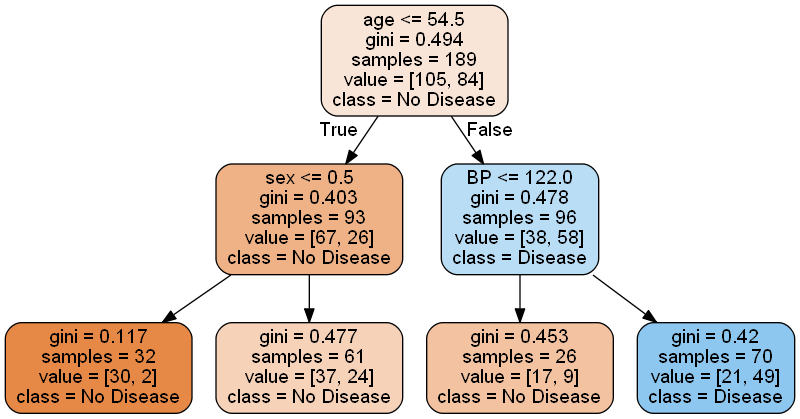

In [110]:
# building the decision tree
graph_output_optimal = graph(dt_depth_optimal)
Image(graph_output_optimal.create_png())

In [111]:
# checking the performance of the model
performance_estimation(dt_depth_optimal)

Train dataset performance
0.7037037037037037
[[84 21]
 [35 49]]
--------------------------------------------------
Test dataset performance
0.5308641975308642
[[27 18]
 [20 16]]
